In [35]:
import pandas as pd 
import numpy as np
df2=pd.read_csv(r"C:\Users\amrut\Desktop\tmdb_5000_movies.csv")
df1=pd.read_csv(r"C:\Users\amrut\Desktop\tmdb_5000_credits.csv")

In [36]:
df1.columns = ['id','tittle','cast','crew']
big_table= df2.merge(df1,on='id')
big_table.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'tittle', 'cast', 'crew'],
      dtype='object')

In [37]:
columns_to_remove = ["budget","homepage","keywords","original_language", "tagline", "title","overview", "production_countries", "production_companies","release_date","revenue","runtime","spoken_languages","tagline","title"]

movies = big_table.drop(columns=columns_to_remove, axis=1)
movies.columns

Index(['genres', 'id', 'original_title', 'popularity', 'status',
       'vote_average', 'vote_count', 'tittle', 'cast', 'crew'],
      dtype='object')

In [38]:
# import random
# movies['liked'] = [random.choice(['yes', 'no']) for _ in range(4803)]

# Define your criteria for a "popular" movie
vote_average_threshold = movies['vote_average'].mean()
vote_count_threshold = movies['vote_count'].mean()
popularity_threshold = movies['popularity'].mean()

# Create the "is_popular" column based on the criteria
movies['liked'] = (
    (movies['vote_average'] >= vote_average_threshold) &
    (movies['vote_count'] >= vote_count_threshold) &
    (movies['popularity'] >= popularity_threshold)
).astype(int)

In [39]:
movies

,genres,id,original_title,popularity,status,vote_average,vote_count,tittle,cast,crew,liked
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,Avatar,150.437577,Released,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",1
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,Pirates of the Caribbean: At World's End,139.082615,Released,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",1
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,Spectre,107.376788,Released,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",1
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,The Dark Knight Rises,112.312950,Released,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",1
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,John Carter,43.926995,Released,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",1
...,...,...,...,...,...,...,...,...,...,...,...
4798,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9367,El Mariachi,14.269792,Released,6.6,238,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",0
4799,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",72766,Newlyweds,0.642552,Released,5.9,5,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",0
4800,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",231617,"Signed, Sealed, Delivered",1.444476,Released,7.0,6,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de...",0
4801,[],126186,Shanghai Calling,0.857008,Released,5.7,7,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de...",0


In [40]:
import ast

def convert_genres(text):
    l = []
    for i in ast.literal_eval(text):
        l.append(i['name'])
    return l

In [41]:
movies['genres'] = movies['genres'].apply(convert_genres)

In [42]:
movies.head(2)

,genres,id,original_title,popularity,status,vote_average,vote_count,tittle,cast,crew,liked
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,Avatar,150.437577,Released,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",1
1,"[Adventure, Fantasy, Action]",285,Pirates of the Caribbean: At World's End,139.082615,Released,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",1


In [43]:
def convert_cast(text):
    l = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            l.append(i['name'])
        counter += 1
    return l

In [44]:
movies['cast'] = movies['cast'].apply(convert_cast)
movies.head(2)

,genres,id,original_title,popularity,status,vote_average,vote_count,tittle,cast,crew,liked
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,Avatar,150.437577,Released,7.2,11800,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",1
1,"[Adventure, Fantasy, Action]",285,Pirates of the Caribbean: At World's End,139.082615,Released,6.9,4500,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",1


In [45]:
def fetch_director(text):
    l = []
    for i in ast.literal_eval(text):
        if i['job'] == "Director":
            l.append(i['name'])
            break
    return l

In [46]:
movies['Director'] = movies['crew'].apply(fetch_director)
movies.drop(['crew','status'],axis="columns",inplace=True)
movies.head(2)

,genres,id,original_title,popularity,vote_average,vote_count,tittle,cast,liked,Director
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,Avatar,150.437577,7.2,11800,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",1,[James Cameron]
1,"[Adventure, Fantasy, Action]",285,Pirates of the Caribbean: At World's End,139.082615,6.9,4500,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",1,[Gore Verbinski]


In [47]:
movies.head(2)

,genres,id,original_title,popularity,vote_average,vote_count,tittle,cast,liked,Director
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,Avatar,150.437577,7.2,11800,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",1,[James Cameron]
1,"[Adventure, Fantasy, Action]",285,Pirates of the Caribbean: At World's End,139.082615,6.9,4500,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",1,[Gore Verbinski]


In [48]:
movies['Director'] = movies['Director'].apply(lambda x: ''.join(x))
movies['genres'] = movies['genres'].apply(lambda x: ''.join(x))
movies['cast'] = movies['cast'].apply(lambda x: ''.join(x))
movies

,genres,id,original_title,popularity,vote_average,vote_count,tittle,cast,liked,Director
0,ActionAdventureFantasyScience Fiction,19995,Avatar,150.437577,7.2,11800,Avatar,Sam WorthingtonZoe SaldanaSigourney Weaver,1,James Cameron
1,AdventureFantasyAction,285,Pirates of the Caribbean: At World's End,139.082615,6.9,4500,Pirates of the Caribbean: At World's End,Johnny DeppOrlando BloomKeira Knightley,1,Gore Verbinski
2,ActionAdventureCrime,206647,Spectre,107.376788,6.3,4466,Spectre,Daniel CraigChristoph WaltzLéa Seydoux,1,Sam Mendes
3,ActionCrimeDramaThriller,49026,The Dark Knight Rises,112.312950,7.6,9106,The Dark Knight Rises,Christian BaleMichael CaineGary Oldman,1,Christopher Nolan
4,ActionAdventureScience Fiction,49529,John Carter,43.926995,6.1,2124,John Carter,Taylor KitschLynn CollinsSamantha Morton,1,Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...
4798,ActionCrimeThriller,9367,El Mariachi,14.269792,6.6,238,El Mariachi,Carlos GallardoJaime de HoyosPeter Marquardt,0,Robert Rodriguez
4799,ComedyRomance,72766,Newlyweds,0.642552,5.9,5,Newlyweds,Edward BurnsKerry BishéMarsha Dietlein,0,Edward Burns
4800,ComedyDramaRomanceTV Movie,231617,"Signed, Sealed, Delivered",1.444476,7.0,6,"Signed, Sealed, Delivered",Eric MabiusKristin BoothCrystal Lowe,0,Scott Smith
4801,,126186,Shanghai Calling,0.857008,5.7,7,Shanghai Calling,Daniel HenneyEliza CoupeBill Paxton,0,Daniel Hsia


In [49]:
from sklearn.preprocessing import LabelEncoder
le_genres = LabelEncoder()

le_original_title = LabelEncoder()


le_tittle  = LabelEncoder()
le_cast  = LabelEncoder()
le_Director  = LabelEncoder()


In [50]:
movies['genres']=le_genres.fit_transform(movies['genres'])

movies['original_title']=le_original_title.fit_transform(movies['original_title'])



movies['tittle']=le_tittle.fit_transform(movies['tittle'])
movies['cast']=le_cast.fit_transform(movies['cast'])
movies['Director']=le_Director.fit_transform(movies['Director'])

movies

,genres,id,original_title,popularity,vote_average,vote_count,tittle,cast,liked,Director
0,64,19995,372,150.437577,7.2,11800,379,3932,1,886
1,332,285,2665,139.082615,6.9,4500,2648,2269,1,770
2,33,206647,3188,107.376788,6.3,4466,3181,960,1,1972
3,135,49026,3594,112.312950,7.6,9106,3612,794,1,361
4,76,49529,1891,43.926995,6.1,2124,1901,4287,1,94
...,...,...,...,...,...,...,...,...,...,...
4798,141,9367,1138,14.269792,6.6,238,1145,640,0,1896
4799,527,72766,2463,0.642552,5.9,5,2442,1232,0,606
4800,482,231617,3081,1.444476,7.0,6,3072,1330,0,1998
4801,0,126186,3034,0.857008,5.7,7,3021,972,0,440


In [51]:
# x=movies.drop('genres',axis='columns')
# y=movies['genres']
x=movies.drop('liked',axis='columns')
y=movies['liked']

In [52]:
x['vote_average'] = x['vote_average'].astype(int)
x.dtypes
x.isnull().any()

genres            False
id                False
original_title    False
popularity        False
vote_average      False
vote_count        False
tittle            False
cast              False
Director          False
dtype: bool

In [53]:
y.isnull().any()

False

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)

# Create a new DataFrame with scaled values and column names
x = pd.DataFrame(scaled_data, columns=x.columns)
x

,genres,id,original_title,popularity,vote_average,vote_count,tittle,cast,Director
0,-1.712060,-0.419128,-1.463003,4.053183,1.122229,8.999729,-1.458104,1.170248,-0.459022
1,-0.794803,-0.641374,0.191475,3.696258,0.289143,3.086200,0.179399,-0.045445,-0.627444
2,-1.818160,1.685526,0.568838,2.699638,0.289143,3.058657,0.564057,-1.002356,1.117761
3,-1.469055,-0.091779,0.861780,2.854798,1.122229,6.817394,0.875103,-1.123706,-1.221278
4,-1.670988,-0.086108,-0.366993,0.705198,0.289143,1.161467,-0.359700,1.429762,-1.608940
...,...,...,...,...,...,...,...,...,...
4798,-1.448520,-0.538967,-0.910308,-0.227028,0.289143,-0.366329,-0.905293,-1.236284,1.007415
4799,-0.127396,0.175909,0.045725,-0.655378,-0.543943,-0.555076,0.030732,-0.803517,-0.865559
4800,-0.281413,1.967083,0.491633,-0.630170,1.122229,-0.554266,0.485393,-0.731877,1.155510
4801,-1.931106,0.778263,0.457721,-0.648637,-0.543943,-0.553456,0.448588,-0.993584,-1.106577


In [55]:
iqr_multiplier = 1.5

movies_no_outliers = movies.copy()

for column in x:
    q1 = movies[column].quantile(0.25)
    q3 = movies[column].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - iqr_multiplier * iqr
    upper_bound = q3 + iqr_multiplier * iqr
    
    movies_no_outliers = movies_no_outliers[(movies_no_outliers[column] >= lower_bound) & (movies_no_outliers[column] <= upper_bound)]

print(movies_no_outliers)

      genres      id  original_title  popularity  vote_average  vote_count  \
10       338    1452            3320   57.925623           5.4        1400   
15       321    2454            3546   53.978602           6.3        1630   
21         2   20662            2878   37.668301           6.2        1398   
23       331    2268            3703   42.990906           5.8        1303   
54       263  105864            3704   51.692953           6.6        1736   
...      ...     ...             ...         ...           ...         ...   
4797     885   67238             700    0.022173           7.5           2   
4798     141    9367            1138   14.269792           6.6         238   
4799     527   72766            2463    0.642552           5.9           5   
4801       0  126186            3034    0.857008           5.7           7   
4802     601   25975            2406    1.929883           6.3          16   

      tittle  cast  liked  Director  
10      3317   515      0

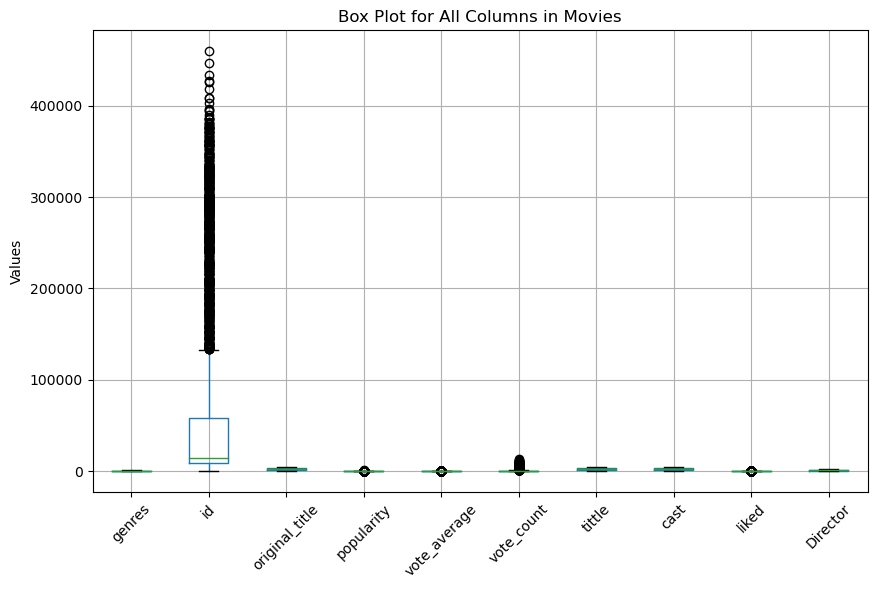

In [56]:
import pandas as pd
import matplotlib.pyplot as plt



# Create a box plot for all columns
plt.figure(figsize=(10, 6))
movies.boxplot()
plt.title('Box Plot for All Columns in Movies')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 4. Train the Logistic Regression model
logistic_regression = LogisticRegression(solver='liblinear')  # You can choose a different solver if needed
logistic_regression.fit(X_train, y_train)

# 5. Make predictions
y_pred = logistic_regression.predict(X_test)
y_plot = logistic_regression.predict_proba(X_test)[:, 1]  # Get the probabilities for class 1

# 6. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 7. Print classification report for additional evaluation metrics
classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.9323621227887617

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       769
           1       0.87      0.78      0.82       192

    accuracy                           0.93       961
   macro avg       0.91      0.87      0.89       961
weighted avg       0.93      0.93      0.93       961



Text(0.5, 1.0, 'Confusion Matrix')

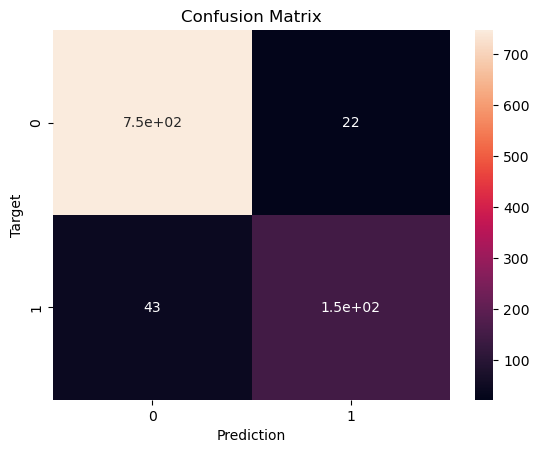

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

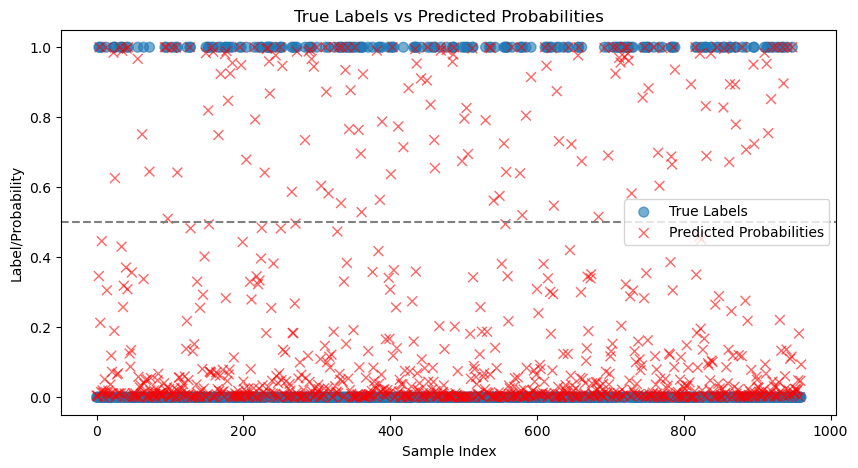

In [60]:

plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, label='True Labels', marker='o', linestyle='', s=50, alpha=0.6)
plt.scatter(range(len(y_plot)), y_plot, label='Predicted Probabilities', color='red', marker='x', linestyle='', s=50, alpha=0.6)
plt.axhline(y=0.5, color='gray', linestyle='--')
plt.legend()
plt.title("True Labels vs Predicted Probabilities")
plt.ylabel("Label/Probability")
plt.xlabel("Sample Index")
plt.show()

In [61]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,f1_score,precision_score,recall_score
mse=mean_squared_error(y_test,y_pred)
print(f"MSE={mse}")
mae=mean_absolute_error(y_test,y_pred)
print(f"MAE={mae}")
f1 = f1_score(y_test, y_pred)
print(f"F1 Score={f1}")
precision = precision_score(y_test, y_pred)
print(f"Precision={precision}")
recall = recall_score(y_test, y_pred)
print(f"Recall={recall}")


MSE=0.06763787721123829
MAE=0.06763787721123829
F1 Score=0.8209366391184574
Precision=0.8713450292397661
Recall=0.7760416666666666


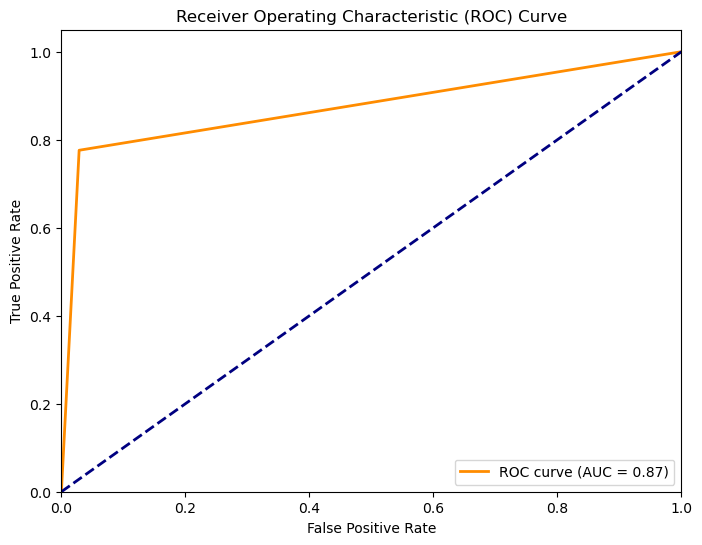

In [62]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

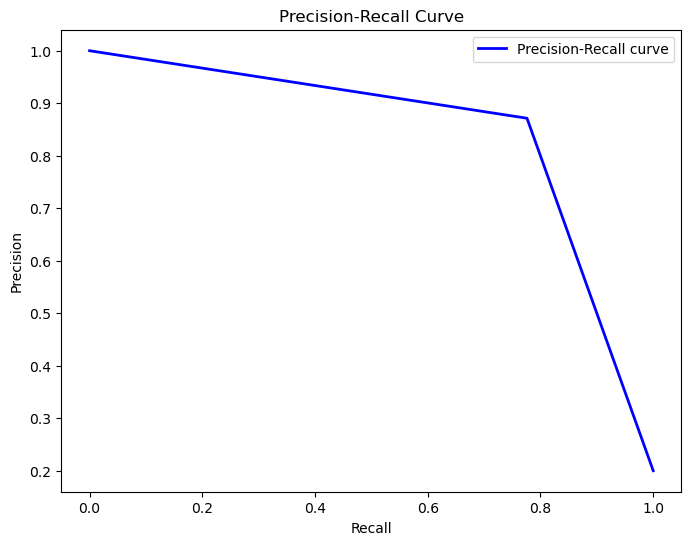

In [63]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()


In [64]:
from sklearn.metrics import log_loss
log_loss_value = log_loss(y_test, y_pred)
print(log_loss_value)


2.4379162021775387


In [65]:
y_test.size

961

In [66]:
from sklearn.model_selection import GridSearchCV
logistic_regression = LogisticRegression(solver='liblinear')
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Create a GridSearchCV object with the Logistic Regression model and the parameter grid
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [67]:
accuracy = best_model.score(X_test, y_test)
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy on Test Data: {accuracy}")

Best Hyperparameters: {'C': 0.1, 'penalty': 'l1'}
Accuracy on Test Data: 0.9354838709677419
